# Подготовка данных

In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
all_data = pd.concat([train, test])
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
all_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [5]:
# Преобразовывает строковые категориальные признаки в численные
def to_categorical(df, columns):
  for column in columns:
    for i, v in enumerate(df[column].dropna().unique()):
      df.loc[df[column] == v, column] = i
    df[column] = df[column].astype('float64')

  return df

In [6]:
all_data = to_categorical(all_data, ['Sex', 'Embarked'])

<Axes: >

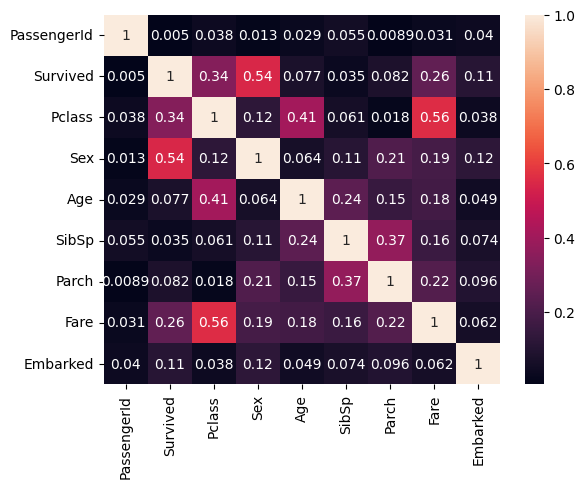

In [7]:
import seaborn as sns

# Просматриваем связь между признаками и визуализируем с помощью тепловой картой
corr = all_data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr().abs()
sns.heatmap(corr, annot=True)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

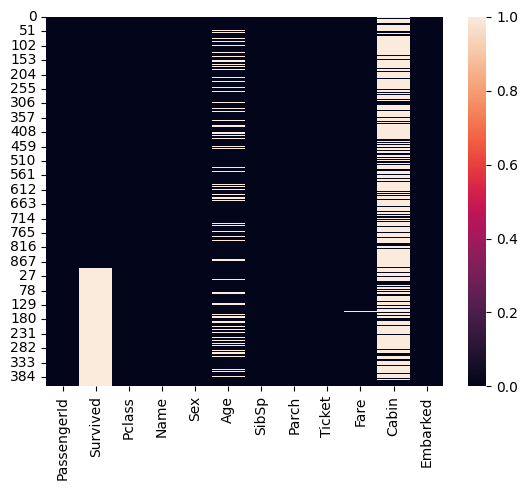

In [8]:
# Смотрим долю пропущенных значений и визуализируем с помощью тепловой карты
sns.heatmap(all_data.isnull())
all_data.isna().sum() / all_data.shape[0]

## Заполняем пропуски

### Убираем пропуски в колонке Fare

In [9]:
all_data[all_data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",0.0,60.5,0,0,3701,NaN,NaN,0.0


In [10]:
all_data[all_data.Pclass == 3].Fare.median()

8.05

In [11]:
# Заполняем пропуск медианой для 3го класса
all_data.at[152, 'Fare'] = all_data[all_data.Pclass == 3].Fare.median()

### Убираем пропуски в колонке Embarked

In [12]:
all_data[all_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1.0,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Поскольку строки содержатся только в обучающей выборке, их можно безопасно удалить
all_data.drop(all_data[all_data.Embarked.isna()].index, inplace=True)

### Убираем пропуски в колонке Cabin

In [14]:
all_data.drop(['Cabin'], axis=1, inplace=True)

### Убираем пропуски в колонке Survived

In [15]:
all_data = all_data[~all_data.Survived.isna()]

### Проверяем отсутствие пропусков

PassengerId    0.0000
Survived       0.0000
Pclass         0.0000
Name           0.0000
Sex            0.0000
Age            0.1991
SibSp          0.0000
Parch          0.0000
Ticket         0.0000
Fare           0.0000
Embarked       0.0000
dtype: float64

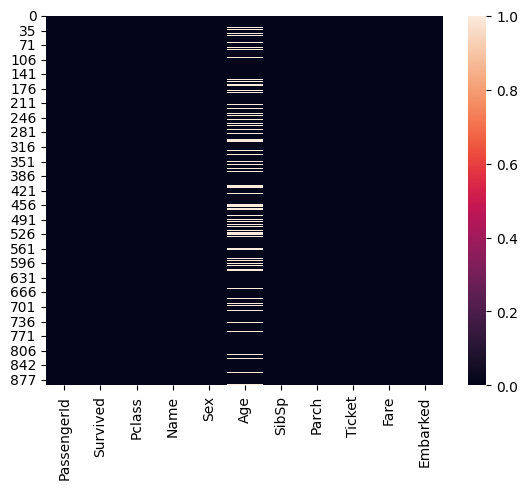

In [16]:
sns.heatmap(all_data.isnull())
all_data.isna().sum() / all_data.shape[0]

## Трансформация значений ячеек

In [17]:
# Кодируем значения категориальных ячеек в One Hot Encoding (OHE)
def to_OHE(df, columns):
  for column in columns:
    for v in df[column].unique():
      df[column+str(v)] = (df[column] == v).astype('float64')
    df.drop(column, axis=1, inplace=True)
  return df

In [18]:
all_data = to_OHE(all_data, ['Pclass', 'Sex', 'Embarked'])
all_data

<ipython-input-17-1e3b5d63ad92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column+str(v)] = (df[column] == v).astype('float64')
<ipython-input-17-1e3b5d63ad92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column+str(v)] = (df[column] == v).astype('float64')
<ipython-input-17-1e3b5d63ad92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass3,Pclass1,Pclass2,Sex0.0,Sex1.0,Embarked0.0,Embarked1.0,Embarked2.0
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
887,888,1.0,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
888,889,0.0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
889,890,1.0,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Убираем ненужные признаки
all_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-19-b93cb6b0d41b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [20]:
# Определяем максимальный возраст
max_age = max(all_data.Age)
max_age

80.0

In [21]:
# Приводим все остальные значения к диапазону от 0 до 1
all_data = all_data / all_data.max()

In [22]:
# Разбиваем all_data на train и на test
X_train = all_data.dropna().drop('Age', axis=1)
y_train = all_data['Age'].dropna()
x_test = all_data[all_data['Age'].isnull()].drop('Age', axis=1)
X_train.shape, y_train.shape, x_test.shape

((712, 12), (712,), (177, 12))

In [23]:
from sklearn.model_selection import train_test_split

# Разбиваем X и y на тренировочные и валидационные подвыборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((569, 12), (143, 12), (569,), (143,))

# Обучение моделей для решения задачи регрессии для колонки Age

## LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Обучаем модель Линейной Регрессии для предсказания возраста
model = LinearRegression()
model = model.fit(X_train, y_train)
pred = model.predict(X_val)
print(mean_absolute_error(pred, y_val))

0.13453442986348174


In [25]:
# Сравним реальный возраст и предсказанный
for i in range(10):
  print(round(y_val.iloc[i] * max_age), round(pred[i] * max_age))

24 36
54 32
52 40
18 23
27 35
17 36
35 18
58 36
47 45
22 23


## DecisionTreeRegression

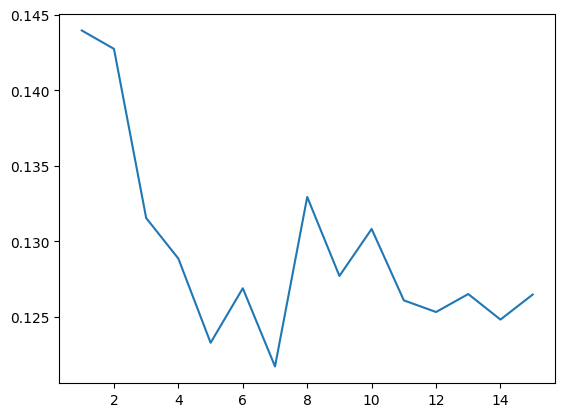

In [26]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

mae = []
max_depth = 15

# Определяем оптимальную глубину дерева
for i in range(1, max_depth + 1):
  model = DecisionTreeRegressor(max_depth=i, random_state=42)
  model = model.fit(X_train, y_train)
  pred = model.predict(X_val)
  mae.append(mean_absolute_error(pred, y_val))

plt.plot(list(range(1, max_depth + 1)), mae)
plt.show()

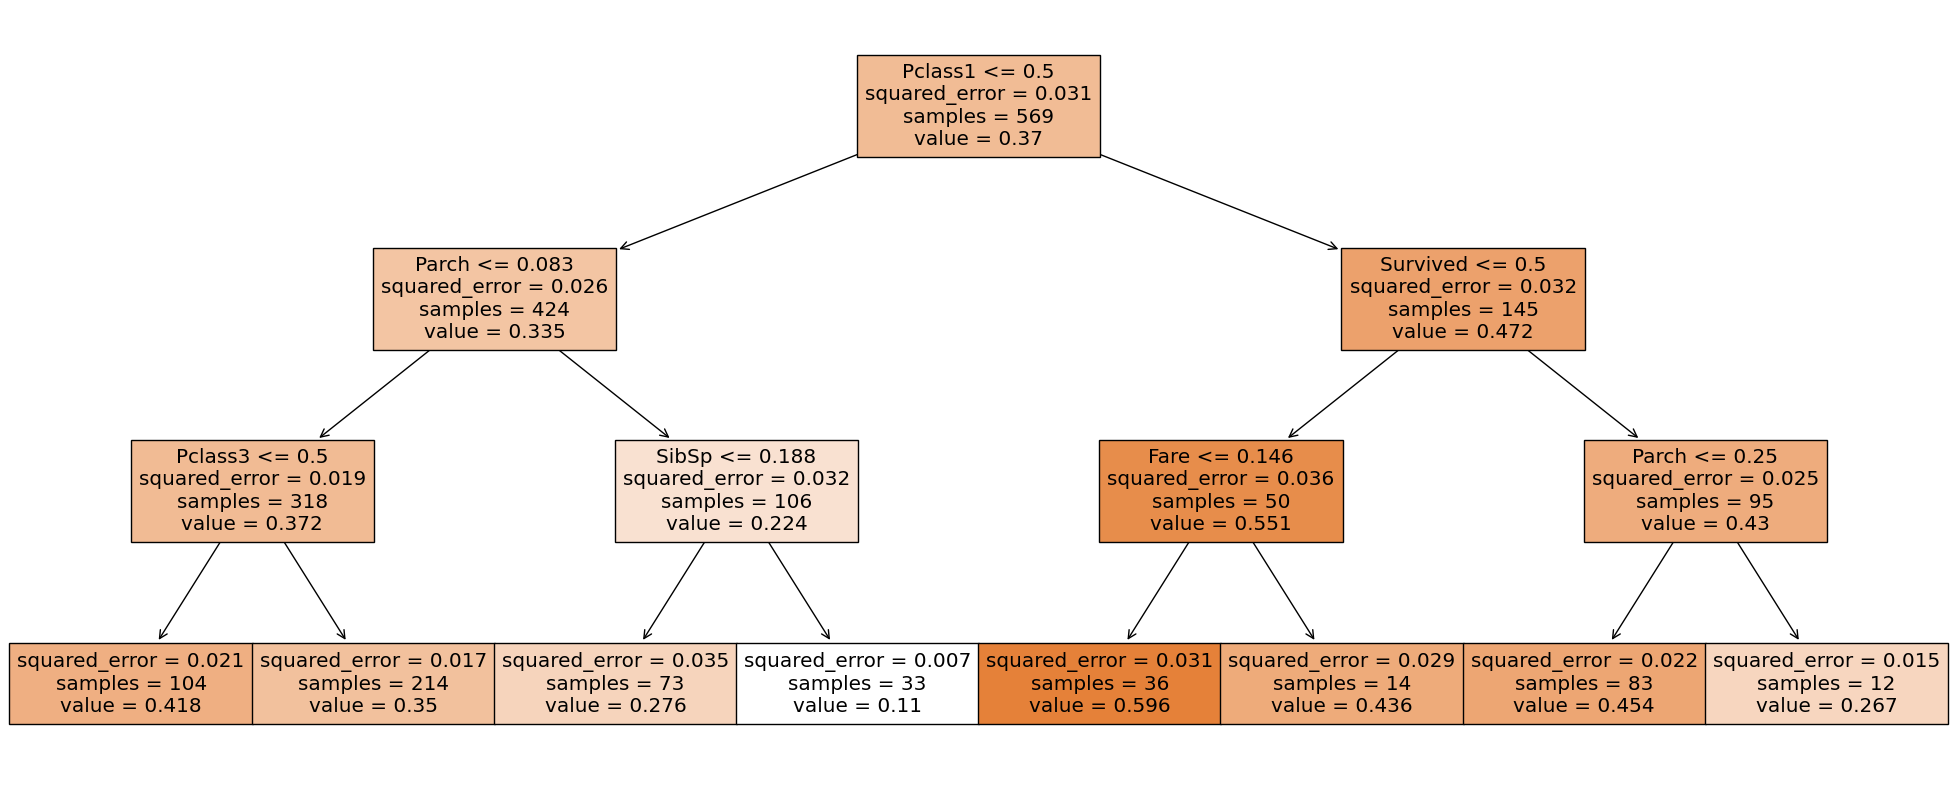

In [27]:
from sklearn.tree import plot_tree

# Визуализируем дерево решений для регрессии глубиной 3
model = DecisionTreeRegressor(max_depth=3)
model = model.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 10))
_ = plot_tree(model,
              feature_names=X_train.columns,
              class_names=y_train.name,
              filled=True)

## KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsRegressor

# Обучаем модель k-ближайших соседей для регрессии
model = KNeighborsRegressor()
model = model.fit(X_train, y_train)
pred = model.predict(X_val)
print(mean_absolute_error(pred, y_val))

0.13292972027972028


## Модель использующая полносвязные слои

In [29]:
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Записываем структуру модели
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1:])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Собираем модель (выбираем алгоритм подбора оптимальных весов(optimizer) и фунуцию потерь)
model.compile(optimizer=Adam(learning_rate=0.001), loss='MAE', metrics='MAE')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Обучаем модель
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   epochs=40, batch_size=128)

Epoch 1/40
5/5 [==============================] - 3s 113ms/step - loss: 0.1558 - MAE: 0.1558 - val_loss: 0.1657 - val_MAE: 0.1657
Epoch 2/40
5/5 [==============================] - 0s 37ms/step - loss: 0.1423 - MAE: 0.1423 - val_loss: 0.1575 - val_MAE: 0.1575
Epoch 3/40
5/5 [==============================] - 0s 28ms/step - loss: 0.1348 - MAE: 0.1348 - val_loss: 0.1558 - val_MAE: 0.1558
Epoch 4/40
5/5 [==============================] - 0s 20ms/step - loss: 0.1320 - MAE: 0.1320 - val_loss: 0.1553 - val_MAE: 0.1553
Epoch 5/40
5/5 [==============================] - 0s 21ms/step - loss: 0.1311 - MAE: 0.1311 - val_loss: 0.1540 - val_MAE: 0.1540
Epoch 6/40
5/5 [==============================] - 0s 26ms/step - loss: 0.1295 - MAE: 0.1295 - val_loss: 0.1516 - val_MAE: 0.1516
Epoch 7/40
5/5 [==============================] - 0s 21ms/step - loss: 0.1276 - MAE: 0.1276 - val_loss: 0.1492 - val_MAE: 0.1492
Epoch 8/40
5/5 [==============================] - 0s 23ms/step - loss: 0.1262 - MAE: 0.1262 - va

In [31]:
# Оцениваем модель на валидационной выборке
loss, metric = model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 7ms/step - loss: 0.1347 - MAE: 0.1347


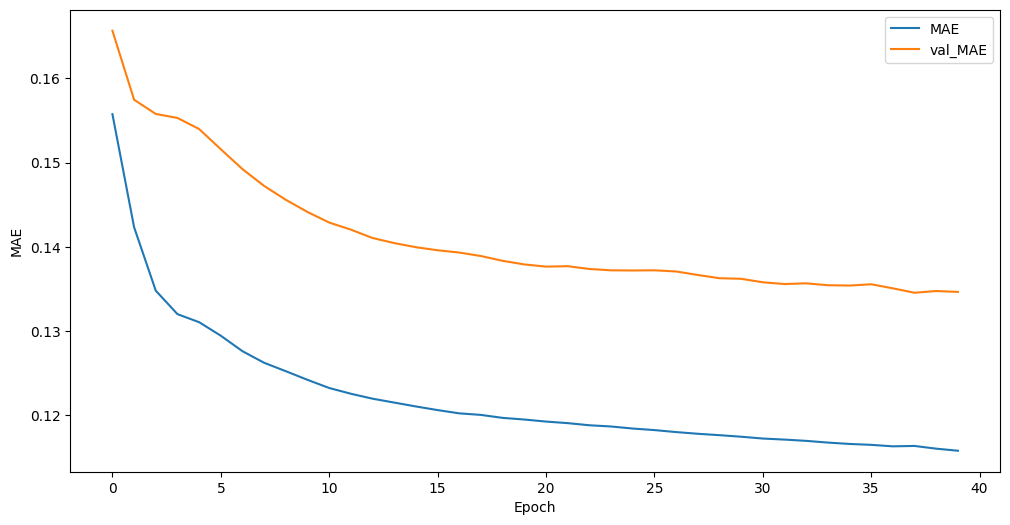

In [32]:
# Визуализируем графики процесса обучения
fig, axes = plt.subplots(figsize=(12, 6), ncols=1, nrows=1)

axes.plot(history.history['MAE'], label='MAE')
axes.plot(history.history['val_MAE'], label='val_MAE')
axes.set_xlabel("Epoch")
axes.set_ylabel("MAE")
axes.legend()

plt.show()

# Кластеризация

In [33]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
columns = iris['feature_names'] + ['target']
data = pd.DataFrame(columns=iris['feature_names']+['target'],
                    data=np.concatenate([iris['data'], iris['target'].reshape(iris['target'].shape[0], 1)], axis=1))
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [34]:
# Нормализуем данные
data[iris['feature_names']] = data[iris['feature_names']] / data[iris['feature_names']].max()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.645570,0.795455,0.202899,0.08,0.0
1,0.620253,0.681818,0.202899,0.08,0.0
2,0.594937,0.727273,0.188406,0.08,0.0
3,0.582278,0.704545,0.217391,0.08,0.0
4,0.632911,0.818182,0.202899,0.08,0.0
...,...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92,2.0
146,0.797468,0.568182,0.724638,0.76,2.0
147,0.822785,0.681818,0.753623,0.80,2.0
148,0.784810,0.772727,0.782609,0.92,2.0


In [35]:
# Разбиваем данные на признаки и целевые значения
X = data.drop(['target'], axis=1)
y = data.target
X.shape, y.shape

((150, 4), (150,))

# PCA (метод главных компонент) для визуализации данных
PCA ищет новые оси координат, по которым данные имеют наибольшую изменчивость, и затем проецирует данные на эти оси, чтобы получить новый набор переменных.

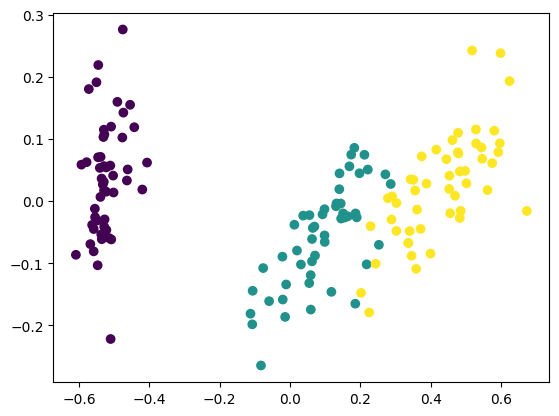

In [36]:
from sklearn.decomposition import PCA

# Понижаем размерность данных для визуализации на плоскости
pca = PCA(n_components=2)
pca.fit(X)
points = pca.transform(X)

plt.scatter(points[:, 0], points[:, 1], c=y)
plt.show()

## Алгоритм K-Means
Алгоритм K-means инициализирует k центроидов (центральная точка кластера) случайным образом. Ближайшая точка к центроиду относится к кластеру представленному этим центроидом. Далее итеративно подбираются оптимальные положения для этих точек.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


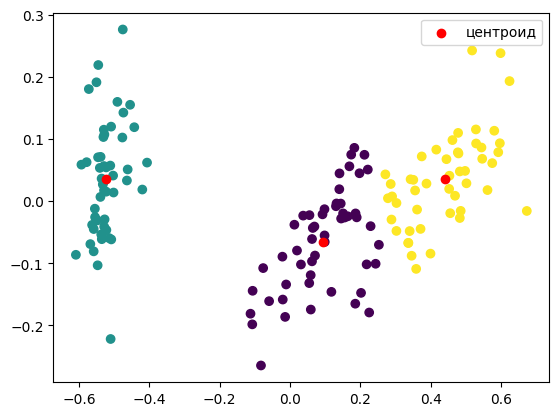

In [37]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
model.fit(X)
pred = model.predict(X)

# Понижаем размерность для координат центроидов для визализации на плоскости
center = pca.transform(model.cluster_centers_)

plt.scatter(points[:, 0], points[:, 1], c=pred)
plt.scatter(center[:, 0], center[:, 1], c='red', label='центроид')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


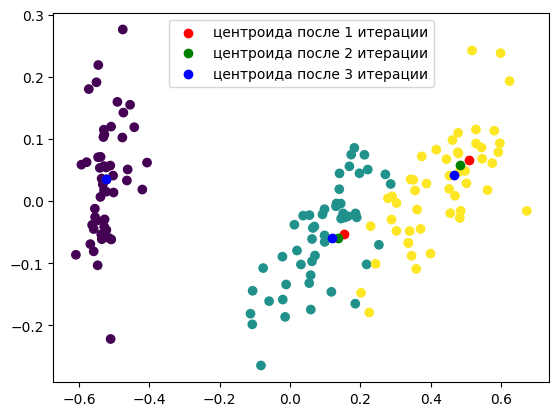

In [38]:
# Визуализируем как итеративно меняются координаты центроид
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1,
                      random_state=42)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2,
                      random_state=42)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3,
                      random_state=42)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

centers_iter1 = pca.transform(kmeans_iter1.cluster_centers_)
centers_iter2 = pca.transform(kmeans_iter2.cluster_centers_)
centers_iter3 = pca.transform(kmeans_iter3.cluster_centers_)

plt.scatter(points[:, 0], points[:, 1], c=y)
plt.scatter(centers_iter1[:, 0], centers_iter1[:, 1], c='red',
            label='центроида после 1 итерации')
plt.scatter(centers_iter2[:, 0], centers_iter2[:, 1], c='green',
            label='центроида после 2 итерации')
plt.scatter(centers_iter3[:, 0], centers_iter3[:, 1], c='blue',
            label='центроида после 3 итерации')
plt.legend()
plt.show()

### Инерция
Качество размещения центроид можно оценить с помощью инерции.
Инерция представляет собой сумму квадратов расстояний от каждой точки данных до ее ближайшего центра кластера.

In [39]:
kmeans_iter1.inertia_, kmeans_iter2.inertia_, kmeans_iter3.inertia_

(3.038714954077128, 2.9468949057436684, 2.883137259905597)

С помощью инерции можно определить оптимальное количество кластеров.

Необходимо построить график зависимости инерции от количества кластеров. На графике необходимо найти локоть (Elbow Method), это число кластеров и будет оптимальным.


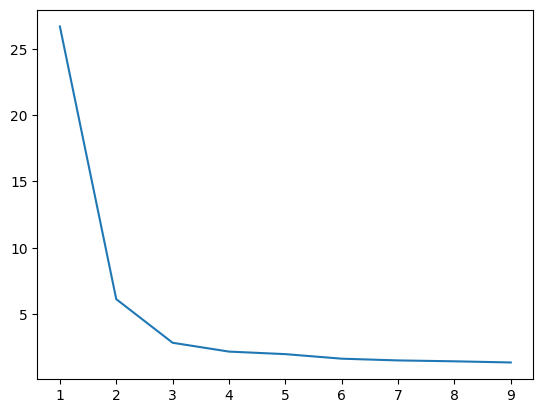

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=1, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias)
plt.show()

По графику видно что оптимальное количество кластеров для наших данных - 2 и 3.

### Где KMeans не справляется

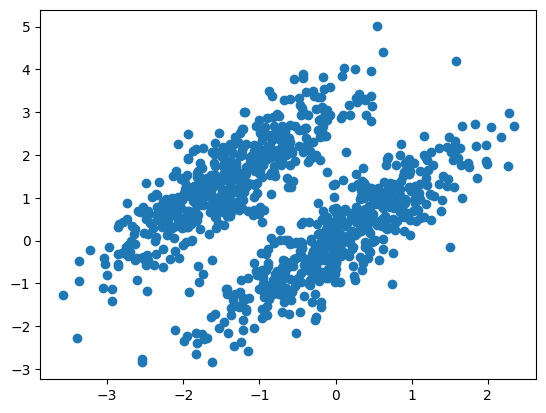

In [41]:
from sklearn.datasets import make_blobs

# Нарисуем синтетический контрпример
X, y = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)),
                  random_state=42)
X = X.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

plt.scatter(X[:, 0], X[:, 1])
plt.show()

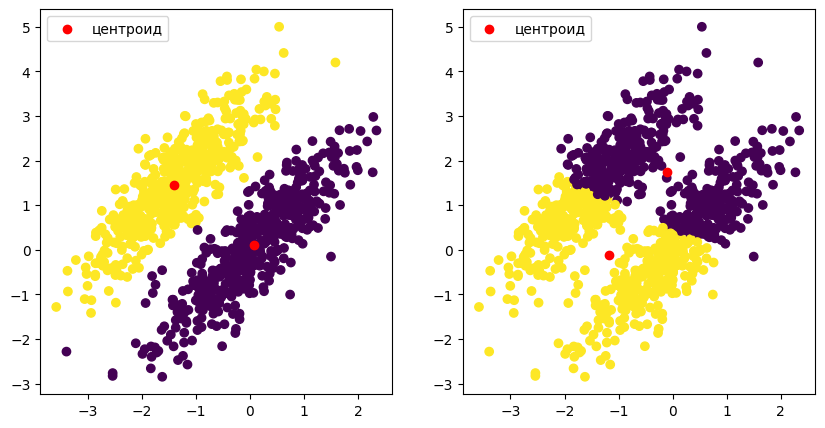

In [42]:
kmeans_correct = KMeans(n_clusters=2, init="random", n_init=1, random_state=42)
kmeans_incorrect = KMeans(n_clusters=2, init="random", n_init=1, random_state=40)

kmeans_correct.fit(X)
kmeans_incorrect.fit(X)

pred_correct = kmeans_correct.predict(X)
pred_incorrect = kmeans_incorrect.predict(X)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(X[:, 0], X[:, 1], c=pred_correct)
axes[0].scatter(kmeans_correct.cluster_centers_[:, 0],
                kmeans_correct.cluster_centers_[:, 1],
                c='red', label='центроид')
axes[0].legend()

axes[1].scatter(X[:, 0], X[:, 1], c=pred_incorrect)
axes[1].scatter(kmeans_incorrect.cluster_centers_[:, 0],
                kmeans_incorrect.cluster_centers_[:, 1],
                c='red', label='центроид')
axes[1].legend()

plt.show()

От случайной инициализации кластеров зависит справится модели или нет

## DBSCAN
Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума.
DBSCAN ищет области с высокой плотностью точек и считает их кластерами, игнорируя области с низкой плотностью.

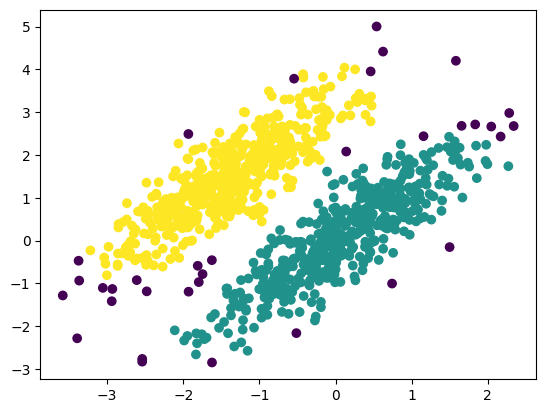

In [43]:
from sklearn.cluster import DBSCAN

# Выполняем кластеризацию с помощью DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
pred = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

In [44]:
# Где '-1' - это выбросы, а остальные числа - кластера
np.unique(pred)

array([-1,  0,  1])

## Агломеративная кластеризация
процесс группировки похожих экземпляров начинается с создания нескольких групп, где каждая группа содержит один объект на начальном этапе, затем он находит две наиболее похожие группы, объединяет их.

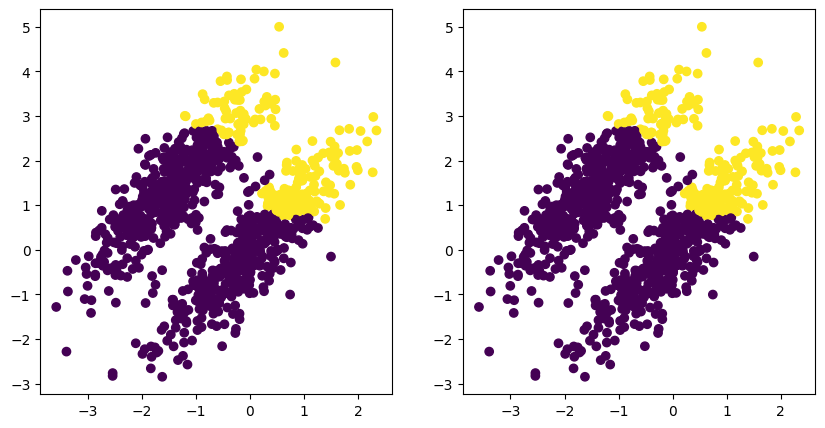

In [45]:
from sklearn.cluster import AgglomerativeClustering

# Используя количество кластеров
pred1 = AgglomerativeClustering(linkage="complete", n_clusters=2,).fit_predict(X)
# Используя дистанции между точками
pred2 = AgglomerativeClustering(linkage="complete", distance_threshold=6, n_clusters=None).fit_predict(X)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(X[:, 0], X[:, 1], c=pred1)
axes[1].scatter(X[:, 0], X[:, 1], c=pred2)
plt.show()

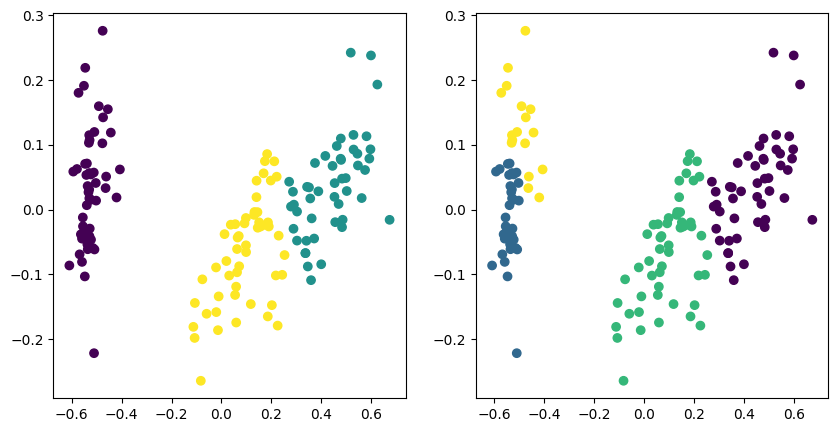

In [46]:
from sklearn.cluster import AgglomerativeClustering

X_iris = data.drop(['target'], axis=1)
y_iris = data.target

pred1 = AgglomerativeClustering(linkage="complete", n_clusters=3).fit_predict(X_iris)
pred2 = AgglomerativeClustering(linkage="complete", distance_threshold=0.5, n_clusters=None).fit_predict(X_iris)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
axes[0].scatter(points[:, 0], points[:, 1], c=pred1)
axes[1].scatter(points[:, 0], points[:, 1], c=pred2)
plt.show()


# Gaussian Mixture
Гауссова смесь - это способ описания сложных распределений, который использует несколько гауссовых функций с разными параметрами. Каждая из этих функций вносит свой вклад в итоговое распределение, что позволяет моделировать данные с более высокой точностью. Эта модель широко используется в статистике, машинном обучении и компьютерном зрении для кластеризации и анализа данных.

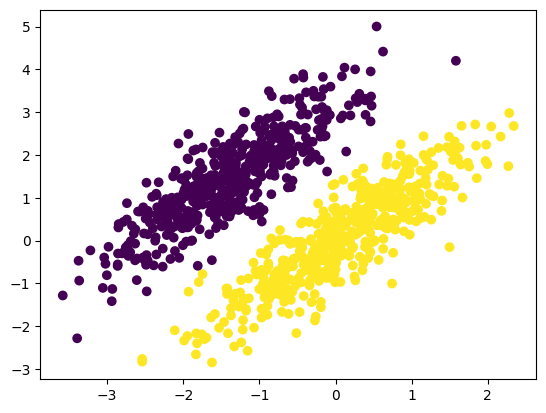

In [47]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
pred = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

# Другие методы понижения размерности

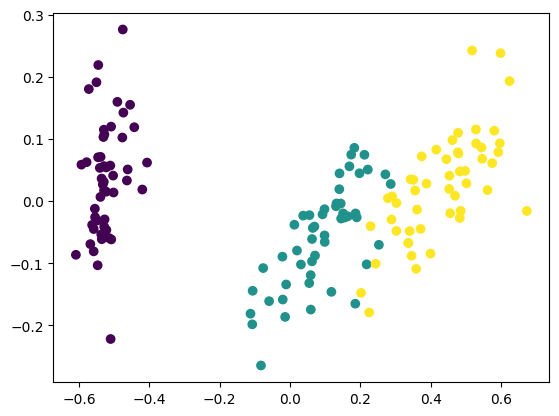

In [48]:
# Еще раз PCA
pca = PCA(n_components=2)
pca.fit(X_iris)
points = pca.transform(X_iris)

plt.scatter(points[:, 0], points[:, 1], c=y_iris)
plt.show()

## Многомерное шкалирование
Понижает размерность, одновременно пытаясь сохранить расстояние между образцами.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


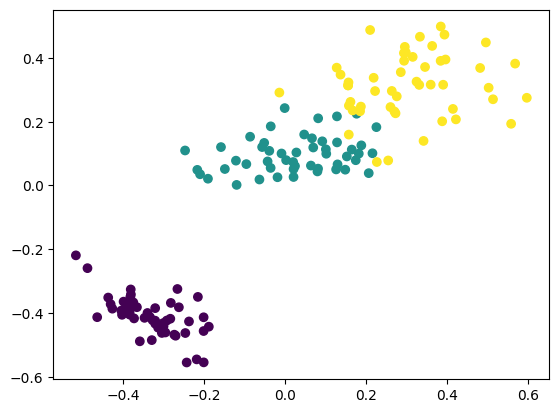

In [49]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_iris)

plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=y_iris)
plt.show()

## Изометрические отображения
Создает граф, соединяя каждый образец с его ближайшими соседями и затем понижает размерность, одновременно пытаясь сохранить геодезическое расстояние (количество ребер между вершинами графа) между образцами.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


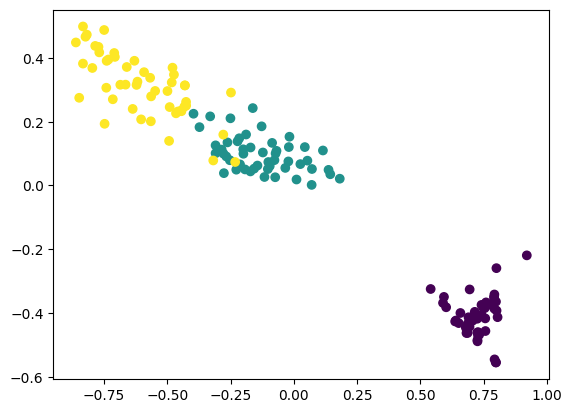

In [50]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_iris)

plt.scatter(X_reduced_isomap[:, 0], X_reduced_mds[:, 1], c=y_iris)
plt.show()

# Домашнее задание
Для данных из data.csv необходимо:
1. Визуализировать информацию с помощью одного из методов понижения размерности.
2. Кластеризовать записи минимум двумя методами кластеризации (K-means и DBSCAN, по желанию можно добавить остальные из блокнота), указать оптимальное количество кластеров (обосновать свой вывод).

In [51]:
data = pd.read_csv('./data.csv', header=None)
data

,0,1,2
0,55.025,39.1,181.0
1,56.375,39.5,186.0
2,58.825,40.3,195.0
3,57.425,36.7,193.0
4,57.325,39.3,190.0
...,...,...,...
328,66.700,55.8,207.0
329,62.375,43.5,202.0
330,61.650,49.6,193.0
331,66.200,50.8,210.0
